# **Devoir 2 MTH6312 - MÉTHODES STATISTIQUES D’APPRENTISSAGE**

## Clémence Duplat 
### Matricule: 2407959

In [1034]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize,poly)

In [1035]:
#de ISLP website
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

## **Question 1:**
On considère la base de données Boston dont la description est disponible
dans le package ISLR2 (voir le document du même nom sur le site du cours).

Question 1a) : En utilisant la fonction lm() de R (ou l’équivalent de Python), effectuer l’ajustement
d’un modèle de régression linéaire simple avec medv (le prix médian en 1000$) comme variable
dépendante (output Y) et crim (le taux de criminalité de la ville) comme variable indépendante
(input X1).
Produire les résultats avec la fonction summary(), les graphiques diagnostiques des résidus avec
la fonction plot() et commenter brièvement sur le points suivants :

              coef  std err      t  P>|t|
intercept  24.0331    0.409  58.74    0.0
crim       -0.4152    0.044  -9.46    0.0


380

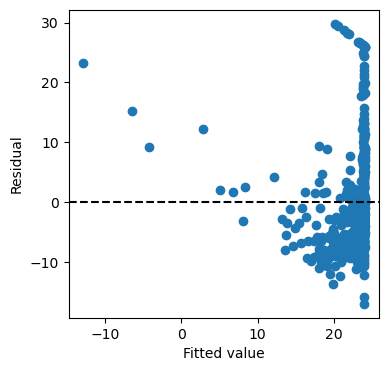

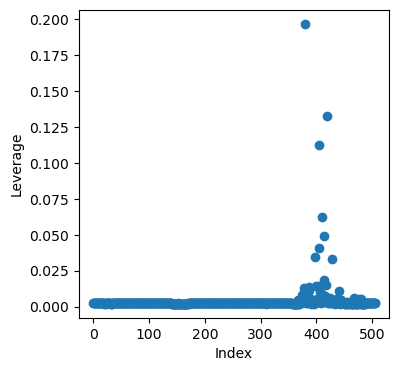

In [1036]:
#Les commentaires en anglais viennent de ISLP website
#On considère la base de données Boston
#Boston Housing values and other information about Boston census tracts.
#medv: prix médian en 1000$, vraibale dépendante Y
#crim: taux de criminalité de la ville, variable indépendante X_1

#TO DO: effectuer l'ajustement du modèle de régression linéaire avec sm.OLS()
#d'abord prendre les colonnes qui nous intéressent
Boston = load_data("Boston")
#Boston.columns
"""Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')"""

#two ways of doing what is the best ?
design = MS(['crim'])
#design  = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),'crim': Boston['crim']})
design = design.fit(Boston)
X_1 = design.transform(Boston)
y = Boston['medv']
# X_1
#Note that sm.OLS() does not ft the model; it specifes the model, and then model.fit() does the actual ftting
model = sm.OLS(y, X_1)
results = model.fit()
# #produces a simple table of the parameters estimate, their standard errors, t-statistics and p-values
print(summarize(results))
#print(results.summary()) #-> encore plus d'infos

#There is some evidence for non-linearity in the relationship between lstat and medv. We will explore this issue later in this lab.
#diagnostic plots, section 3.3.3
ax = subplots(figsize=(4,4))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')
infl = results.get_influence()
ax = subplots(figsize=(4,4))[1]
ax.scatter(np.arange(X_1.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)
# R_square= results.rsquared
# print(R_square) #0.15 -> bad 


1. Le modèle linéaire simple explique-t-il bien le lien entre l’output Y et X1 ? 

 
   Si on regarde uniquement les valeurs obtenues avec summary() on peut penser que crim a un effet statistiquement significatif sur medv. On a une t-statistique de |-9.46| associé à une p-valeure de 0.0. Il y a une forte évidence contre l'hypothèse nulle qui dit qu'il n'y a pas de lien entre medv et crim: crim influence medv et la relation négative est comfirmée statistiquement.

   Cependant, on s'apperçoit que la modèle linéaire n'est peut-être pas suffisant pour expliquer pleinement le lien entre crim et medv:

      a. En regardant le graphiques des résidus en fonction des valeurs ajustées, on apperçoit que la variance des résidus augmente avec les valeurs ajustées, ce qui se nomme "hétéroscédasticité". La variance n'est donc pas constante, ce qui est censé être une hypothèsenécessaire pour un modèle de régression linéaire. 

      b. Ensuite on peut regarder le second graphique du levier en fonction de l'index des points. Un point ayant un levier élevé est un point qui aura une forte influence sur le modèle. On voit que certains points ont un levier plus important que d'autres, ce qui montre également que le modèle ne peut pas être réprésenté correctement de façon linéaire. 

      c. On peut même rentrer plus dans les détails en regardant la valeure de R-carré. Effectivement, on voit que seulement 15% de la variance de medv est expliqué par crim. La relation entre les 2 sera donc potentiellement non-linéaire.

2. Quelle est la valeur de l’output Y prédite par le modèle pour X1 = 4 ?
Donner un intervalle de confiance et un intervalle de prévision pour cette valeur au niveau de
confiance 98%.

In [1037]:
#Question 1a.2)
new_df = pd.DataFrame({'crim':[4]})
newX = design.transform(new_df)
new_predictions = results.get_prediction(newX)
print("Valeur de l'output Y prédite par le modèle pour X1=4")
print(new_predictions.predicted_mean)
#confidence interval
print("Intervalle de confiance")
print(new_predictions.conf_int(alpha=0.02)) #98%
#prediction interval
print("Intervalle de prédiction")
print(new_predictions.conf_int(obs=True, alpha=0.02)) #98%

Valeur de l'output Y prédite par le modèle pour X1=4
[22.37234506]
Intervalle de confiance
[[21.49126983 23.2534203 ]]
Intervalle de prédiction
[[ 2.55346825 42.19122187]]


Question 1b) (3 points) Tracer le nuage de points (en bleu) et ajouter au graphique les éléments suivants :
1. la droite de régression (en rouge) obtenue en a) ;

C:\Users\clemd\AppData\Local\Temp\ipykernel_30104\2381351796.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax,results.params[0],results.params[1],'r--',linewidth=3)


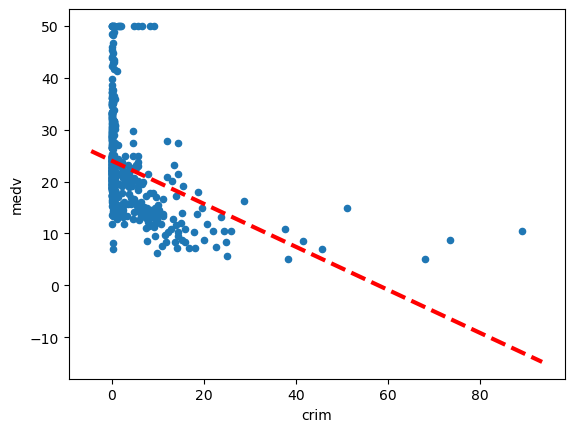

In [1038]:
#Question 1b1)
ax = Boston.plot.scatter('crim', 'medv')
abline(ax,results.params[0],results.params[1],'r--',linewidth=3)


2. en utilisant la fonction seq() de R, subdiviser en 400 valeurs l’intervalle allant du minimum
min(X1) au maximum max(X1) des valeurs de X1. Utiliser ces valeurs pour construire deux
courbes représentant les limites de confiance supérieures et inférieures pour la fonction de
régression (i.e. β0 + β1X1) à 98% ;

C:\Users\clemd\AppData\Local\Temp\ipykernel_30104\3323109806.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax,results.params[0],results.params[1],'r--',linewidth=3, label='droite de régression')


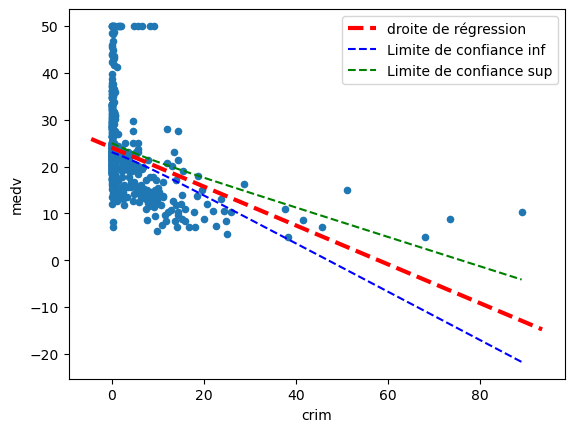

In [1039]:
#Question 1_b_2
crim_seq = np.linspace(Boston['crim'].min(), Boston['crim'].max(),400) 
new_df = pd.DataFrame({'crim':crim_seq})
newX = design.transform(new_df)
new_predictions = results.get_prediction(newX)
prediction_moy=new_predictions.predicted_mean
#intervalle de confiance
conf_int=new_predictions.conf_int(alpha=0.02) #98%
#intervalle de prédiction
pred_int=new_predictions.conf_int(obs=True, alpha=0.02) #98%
ax = Boston.plot.scatter('crim', 'medv')
abline(ax,results.params[0],results.params[1],'r--',linewidth=3, label='droite de régression')
ax.plot(crim_seq, conf_int[:, 0],'b--', label='Limite de confiance inf')
ax.plot(crim_seq, conf_int[:, 1], 'g--', label='Limite de confiance sup')
ax.legend()
plt.show()


3. En utilisant les 400 valeurs de X1 de la sous question précédente, construire deux courbes
représentant les limites de prévision supérieures et inférieures pour Y à 98%.

Remarque : Les courbes des limites de confiance et celles de prévision doivent être de couleurs et
de motifs différents. Pour cela, utiliser les options «col» et «lty» dans les fonctions graphiques
de R telle que plot().

C:\Users\clemd\AppData\Local\Temp\ipykernel_30104\2773366671.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax,results.params[0],results.params[1],'r--',linewidth=3, label='droite de régression')


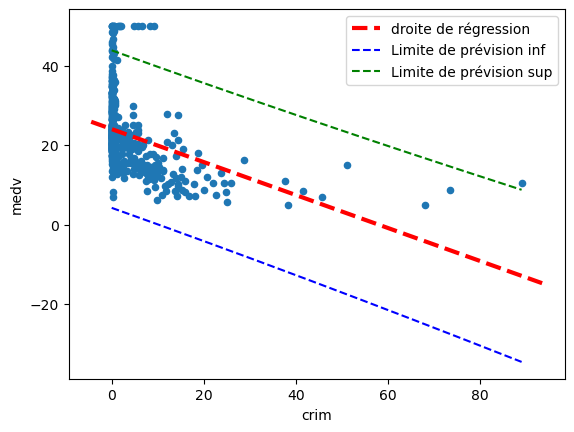

In [1040]:
ax = Boston.plot.scatter('crim', 'medv')
abline(ax,results.params[0],results.params[1],'r--',linewidth=3, label='droite de régression')
ax.plot(crim_seq, pred_int[:, 0],'b--', label='Limite de prévision inf')
ax.plot(crim_seq, pred_int[:, 1], 'g--', label='Limite de prévision sup')
ax.legend()
plt.show()

Question 1c): (3 points) On considère la variable chas (codée 1 si région est délimitée par la rivière Charles et 0
sinon) comme deuxième input (X2) et un modèle de régression linéaire avec interaction d’équation
Y = β0 + β1X1 + β2X2 + β3X1X2 + ε.

Procéder à l’ajustement de ce modèle et, à l’aide d’un seul test de seuil critique 2%, dire si le
prix médian (medv) en fonction du taux de criminalité (crim) peut être représenté par une seule
équation, que la maison soit dans une région délimitée par la rivière Charles ou non.

In [1041]:
#Question 1c
#X_2 = on considère la variable chas -> 1 délimité par rivière Charles, 0 sinon

#X = MS(['crim', 'chas',('crim', 'chas')]).fit_transform(Boston)
# #procéder à l'ajustement de ce modèle
# model1 = sm.OLS(y, X)
# results1 = model1.fit()
#mieux de faire autrement sachant que Y=b0+b1*X2 + b2*X2 +b3*X1*X2 + epsilon
X_int = pd.DataFrame({
    'intercept': np.ones(Boston.shape[0]),
    'crim': Boston['crim'],
    'chas': Boston['chas'],
    'interaction': Boston['crim']*Boston['chas']  #X1*X2
    })
y=Boston['medv']  
#effectuer comme en 1a
model=sm.OLS(y, X_int)
results=model.fit()
print(summarize(results))
#print(results.summary())
# R_squared= results.rsquared
# print(R_squared)
# #test de seuil critique
# rse= np.sqrt(results.scale)
# print(rse)

                coef  std err       t  P>|t|
intercept    23.6377    0.418  56.595  0.000
crim         -0.4123    0.043  -9.502  0.000
chas          3.5036    1.816   1.930  0.054
interaction   1.1137    0.576   1.934  0.054


On voit que si on utilise seuil critique de 2%, les testes montrent une valeur de p=0.054 pour l'interaction entre crim et chas ainsi que pour l'interaction de chas avec lui-même. Les deux ne sont donc pas statistiquement significatif (car p doit être plus petit ou égal à 0.02). Le modèle pourrait être représenté par une seule équation, peu importe que la maison soit dans une région délimitée par la rivière Charles ou non.

Question 1d) (2 points) On considère à présent un modèle de régression avec Y comme output, et toutes les
autres variables de la base de données comme input.
Procéder à l’ajustement de ce modèle : 

(a) identifier les variables qui ne contribuent pas significativement au modèle ;

Les variables qui ne contribuent pas significativement au modèle sont celles avec p>0.02, c'est à dire les variables "indus" et "age". Elles n'ont pas d'effets significatif sur la variable dépendante medv.


(b) obtenir les graphiques diagnostiques des résidus et dire s’il y a présence d’anomalies, de points influents, etc ;

Comme dans le point 1a, on peut analyser les graphiques diagnostiques des résidus. Dans le graphique des résidus vs les valeurs ajustées, on remarque que les résidus sont globalement centrés autour de 0 mais toujours avec une légère hétéroscédasticité. Certaines valeures sont atypiques (elles ont un résidu postif ou négatif plus élevé) ce qui indique que l'erreur n'aurait donc pas de variance constante. En analysant le graphique avec les valeurs leviers, on apperçoit que la majorité des valeurs ont un levier bas (ce qui est attendu) mais que certains points (notament autour de l'index 400) ont un levier beaucoup plus élévés. Cela indique la présence de points influents qui ont une plus grand influence sur le modèle, et auquels on doit donc faire attention. 

 (c) proposer un modèle simplifié et justifier votre choix.

 En prenant les remarques faites au point précédent, on peut proposer un modèle simplifié. D'abord on va retirer les variables qui ne contribuent pas significativement au modèle. Ensuite, on peut aussi retirer les variables avec une grande collinéarité. Ceci sera donc notre modèle simplifié. 

              VIF
crim     1.765478
zn       2.239107
chas     1.056997
nox      3.758338
rm       1.819577
dis      3.438955
rad      6.826385
tax      7.258419
ptratio  1.755565
lstat    2.527415


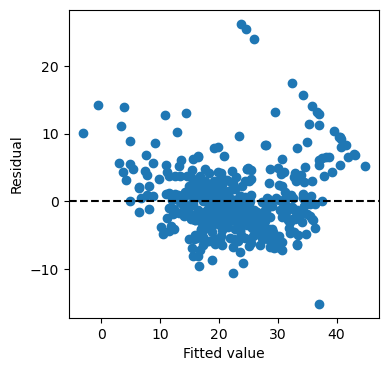

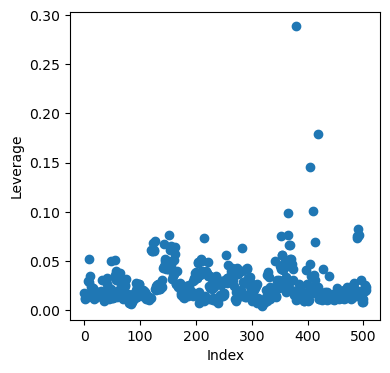

In [1042]:
#----------------------------a-------------------------------#
#variable qui ne contribuent pas significativeement au modèle
terms = Boston.columns.drop('medv') 
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
# print(results.summary())

#-------------------------b--------------------------------#
#obtenir les graphiques des résidues et dire s'il y a présence d'anomalies, points influents etc
ax = subplots(figsize=(4,4))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')
infl = results.get_influence()
ax = subplots(figsize=(4,4))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)


#-------------------------c--------------------------------#
minus_vars = Boston.columns.drop(['medv', 'age','indus'])
Xma = MS(minus_vars).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
result_1=model1.fit()
# print(summarize(model1.fit()))
# print(result_1.summary())

# sm.graphics.influence_plot(result_1, criterion="cooks")
# plt.show()
#section 3.6.4 : collinéarité entre les variables explicatives
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
vals = []
for i in range(1, Xma.values.shape[1]):
    vals.append(VIF(Xma.values, i))
vif_df = pd.DataFrame({'VIF': vals}, index=Xma.columns[1:])
print(vif_df)
#on va retirer les val avec une grande collinéarité
minus_vars_2 = Boston.columns.drop(['medv', 'indus', 'age', 'rad', 'tax'])
Xma_2 = MS(minus_vars_2).fit_transform(Boston)
model2 = sm.OLS(y, Xma_2)
result_2=model2.fit()
# print(result_1.summary())
# ax = subplots(figsize=(4,4))[1]
# ax.scatter(result_2.fittedvalues , result_2.resid)
# ax.set_xlabel('Fitted value')
# ax.set_ylabel('Residual')
# ax.axhline(0, c='k', ls='--');
# infl = result_2.get_influence()
# ax = subplots(figsize=(4,4))[1]
# ax.scatter(np.arange(X_1.shape[0]), infl.hat_matrix_diag)
# ax.set_xlabel('Index')
# ax.set_ylabel('Leverage')
# np.argmax(infl.hat_matrix_diag)


## **Question 2**


Question 2a: Ajuster le modèle de régression linéaire (contexte de classification) avec les données
d’entraînement. Utiliser le résultat pour classifier les données de test et déterminer le taux d’erreur.


In [1043]:
from sklearn.model_selection import train_test_split
#Génération de données basé sur ma matricule
#utilisation du default dataset see section 4 
default = load_data("Default")
#print(default.columns)
#Index(['default', 'student', 'balance', 'income'], dtype='object')
matricule=2405979
np.random.seed(matricule)
mondata = default.sample(400, random_state=matricule)
don_entr,don_test=train_test_split(mondata, train_size=0.75, random_state=matricule)


In [1044]:
#Question 2a
#Ajuster le modèle de régression linéaire (contexte de classification)
#y_i: yes or no -> 1 or 0
#xi_1 = Income
#xi_2 = Balance
# 300 observations d'entrainement
# 100 observations de test
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from ISLP import confusion_table
x_entr=don_entr[['income','balance']]
y_entr=don_entr['default']
x_test=don_test[['income','balance']]
y_test=don_test['default']
#print(y_test)
# print(y_test)
hit_lm = LinearRegression().fit(x_entr, np.where(y_entr == 'Yes', 1, 0))
y_pred=hit_lm.predict(x_test)
#print(y_pred)
y_pred_bin=np.where(y_pred>0.5, 'Yes', 'No')
taux_erreur=1-accuracy_score(y_test, y_pred_bin)
print("Le taux d'erreur pour la régression linéaire est le suivant:")
print("{:.4f}".format(taux_erreur))
print("On a classifié les données et on peut avoir la confusion table suivante:")
C = confusion_table(y_pred_bin, y_test)
C


Le taux d'erreur pour la régression linéaire est le suivant:
0.0400
On a classifié les données et on peut avoir la confusion table suivante:


Truth,No,Yes
Predicted,,
No,96,4
Yes,0,0


Question 2b: Considérer le classificateur du KNN (avec la distance euclidienne). Pour chaque valeur
du nombre de voisins K (avec K = 1, 2, . . . , 180) : entraîner le classificateur du KNN avec les
données d’entraînement, classifier les données de test et déterminer le taux d’erreur. Tracer la
courbe du taux d’erreur en fonction de 1/K et déterminer la valeur optimale de K.

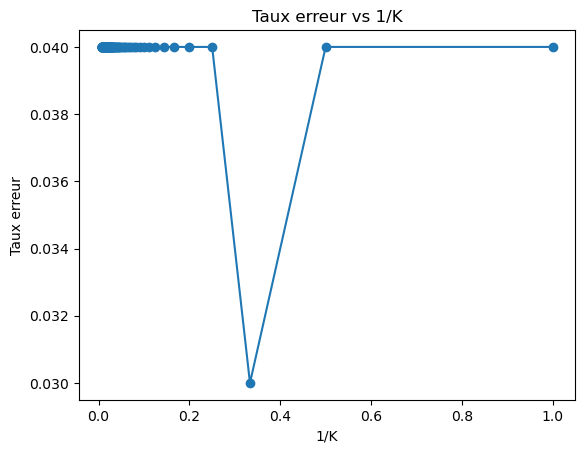

La valeur optimale est simplement obtenu en prenant le minimum de la courbe:
Nous avons donc k: 3, avec une erreur de 0.0300 pour le classificateur KNN 
A nouveau nous pouvons donner la confusion table: 


Truth,No,Yes
Predicted,,
No,96,3
Yes,0,1


In [1045]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#voir section 4 dans le sylab ISLP_web

K_max = 149 #180 fonctionne pas pour des raisons de performance ? mais c'est suffisant de faire 140 parce que l'erreur ne fait que monter après
taux_err=[]
for k in range(1, K_max + 1):
    knn = KNeighborsClassifier(n_neighbors=k) #dist euclidienne c'est le default
    knn_pred = knn.fit(x_entr,y_entr).predict(x_test) 
    #on va pas faire la confusion pour chaque boucle sinon trop lourd
    taux_err.append(1-accuracy_score(y_test, knn_pred))

plt.plot([1/k for k in range(1, K_max + 1)], taux_err, marker='o')
plt.xlabel('1/K')
plt.ylabel('Taux erreur')
plt.title('Taux erreur vs 1/K')
plt.show()

#k opti c'est le minimum de la courbe
k_optimal=np.argmin(taux_err)+1  
print("La valeur optimale est simplement obtenu en prenant le minimum de la courbe:")
print(f"Nous avons donc k: {k_optimal}, avec une erreur de {min(taux_err):.4f} pour le classificateur KNN ")

knn_optimal=KNeighborsClassifier(n_neighbors=k_optimal)
knn_pred_optimal=knn_optimal.fit(x_entr, y_entr).predict(x_test)
C = confusion_table(knn_pred_optimal, y_test)
print("A nouveau nous pouvons donner la confusion table: ")
C

    

On apperçoit que le taux d'erreur est déjà mieux avec un classificateur KNN (k=3) qu'avec la régression linéaire

Question 2c : Ajuster le modèle de régression logistique (contexte de classification) avec les données
d’entraînement. Utiliser le résultat pour classifier les données de test et déterminer le taux d’erreur.

In [1046]:
from sklearn.linear_model import LogisticRegression
#voir ISLP website
log_model = LogisticRegression()
log_model.fit(x_entr, y_entr)
y_pred_proba=log_model.predict_proba(x_test)
logit_labels=np.where(y_pred_proba[:, 1] > 0.5, 'Yes', 'No')
taux_erreur=1-accuracy_score(y_test, logit_labels)
print(f"Le taux d'erreur avec le modèle de régression logistique est: {taux_erreur:.4f}")
print("La confusion table est la suivante:")
confusion_table(logit_labels, y_test)

Le taux d'erreur avec le modèle de régression logistique est: 0.0100
La confusion table est la suivante:


Truth,No,Yes
Predicted,,
No,96,1
Yes,0,3


Question 2d: Produire un seul graphique (en utilisant toutes les 400 observations), similaire à ceux
des figures 2.1 à 2.3 pages 13 à 16 de ESL, contenant les trois courbes délimitant les deux classes
selon chacune des méthodes de classification : la régression linéaire, la régression logistique, la
méthode du KNN avec la valeur optimale de K obtenue en b).

Remarque. Veuillez noter que sur les figures 2.1 à 2.3 de ESL, seuls les points de grande taille
font partie des observations de l’échantillon.


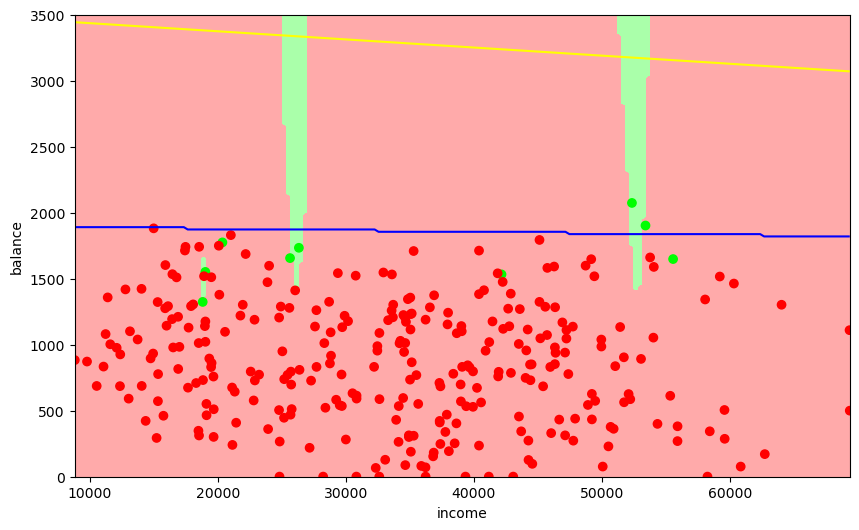

In [1047]:
from matplotlib.colors import ListedColormap

#on va prendre les valeurs et convertir le yes no en binaire pour pouvoir les classifier sur le plot
#yes=1, no=0
X=x_entr[['income', 'balance']].values
y=np.where(y_entr== 'Yes', 1,0)  
#source: https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/neighbors/plot_classification.html
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, 3500#X[:, 1].max() + 1 #je dois augmenter sinon j etrouve pas le lin
#arrange prend trop de mémoire donc je remplace en utilisant linspace
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))

#on doit les changer en 0 1 plutôt que yes no donc je fais direct avec X et y
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X, y)
log_model_0 = LogisticRegression()
log_model_0.fit(X, y)
lin_model = LinearRegression()
lin_model.fit(X, y)
Z_knn= knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z_log =log_model_0.predict(np.c_[xx.ravel(), yy.ravel()])
Z_lin=lin_model.predict(np.c_[xx.ravel(), yy.ravel()])

Z_knn= Z_knn.reshape(xx.shape)
Z_log= Z_log.reshape(xx.shape)
Z_lin= Z_lin.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_knn, cmap=cmap_light)
plt.contour(xx, yy, Z_log, levels=[0.5], colors='blue')
#reg lineaire apparait pas bizarre# ah -> changer le level
plt.contour(xx, yy, Z_lin, levels=[0.3], colors='yellow')
#aussi plot les training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('income')
plt.ylabel('balance')
plt.show()

On voit bien les frontières de décision pour les trois méthodes. La frontière pour KNN avec k=3 est irrégulière, pour la logistique elle est horizontale variant un petit peu (principalement influencée par balance), et pour la linéaire elle est droite et semble moins adapté pour la classification. On voit directement que cela correspond aux taux d'erreurs calculés plus haut. 

Question 2e: Supposons qu’un individu présente les caractéristiques suivantes : revenu annuel x1 =
42 000,00 dollars ; dette sur les cartes de crédit x2 = 1 250,00 dollars. En utilisant l’ensemble
des 400 observations et chacune des trois méthodes étudiées, quelle prévision peut-on faire sur
le statut du crédit de l’individu ? Commenter brièvement

In [1048]:

individu=np.array([[42000, 1250]]) #valeur revenu annuel, dette sur les cartes de crédit
individu_df=pd.DataFrame(individu, columns=['income', 'balance']) #nom de colonnes pour la reg lineaire
lin=hit_lm.predict(individu_df)
lin_yes_no='Yes' if lin> 0.5 else 'No'
print(f"Prédiction avec la régression linéaire : {lin_yes_no}")
logit = log_model.predict(individu)
logit_yes_no = 'Yes' if logit[0] == 1 else 'No'
print(f"Prédiction avec la régression logistique : {logit_yes_no}")
knn_0_1 = knn.predict(individu)
knn_yes_no = 'Yes' if knn_0_1[0] == 1 else 'No'
print(f"Prédiction avec classification KNN (k={k_optimal}) : {knn_yes_no}")


Prédiction avec la régression linéaire : No
Prédiction avec la régression logistique : No
Prédiction avec classification KNN (k=3) : No


c:\Users\clemd\anaconda3\envs\datamining\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Les résultats sont cohérents pour les 3 méthodes de classification: No. L'individu avec un revenu de 42 000$ et une dette de 1250$ ne présente pas un profil à risque de défaut. Aussi, on peut dire que les 2 variables income et balance sont assez distinctives pour séparer les individus qui font défaut ou non. Même la régression linéaire semble bien classifier, et ce je pense car c'est un No et que ils sont en grande majorité comparé au Yes.